# Production Model And Insights
---

## Import Libraries And Modules

In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Plotting libraries
import seaborn as sns

/Users/junkai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


---

## Load Data

Load `to_preprocess.csv`, `predict.csv` and `feature_importance.csv` from `data` folder into a pandas DataFrame.

In [2]:
df = pd.read_csv('../data/to_preprocess.csv')
predict = pd.read_csv('../data/predict.csv')['0']
feature_importance = pd.read_csv('../data/feature_importance.csv')

---

## Plotting And Interpreting Best Model

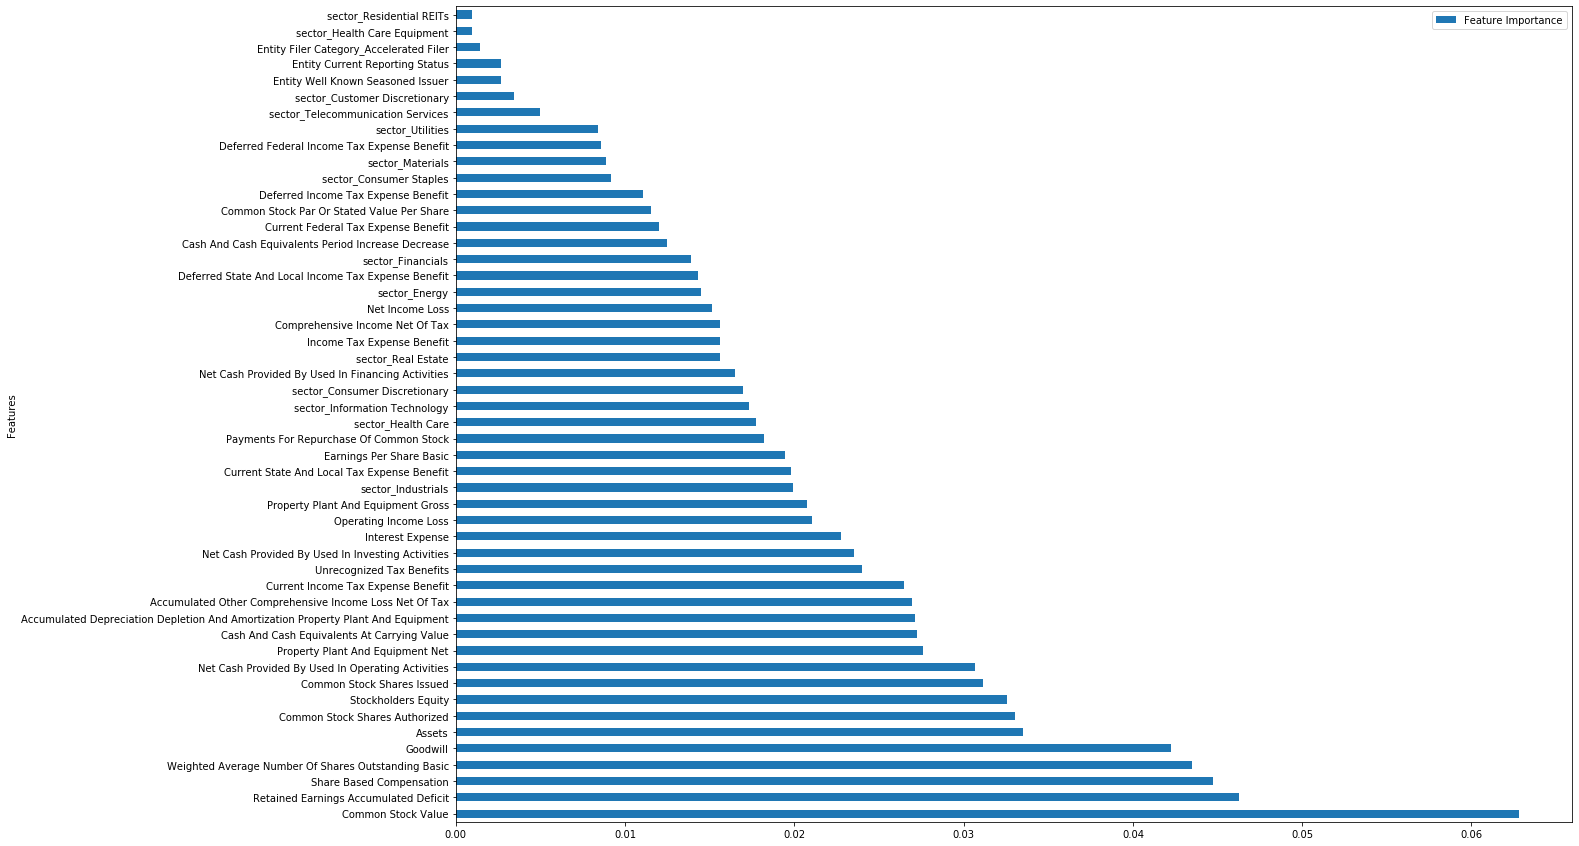

In [3]:
feature_importance.iloc[:50].plot.barh(
    x='Features', 
    figsize=(20, 15)
);

In [4]:
feature_importance.loc[
    feature_importance['Features'] == 'Weighted Average Number Of Shares Outstanding Basic', 
    'Features'
] = 'Weighted Avg No Of Shares o/s'

In [5]:
df.rename(columns={
    'Weighted Average Number Of Shares Outstanding Basic': 'Weighted Avg No Of Shares o/s'
}, inplace=True)

In [6]:
log_fs = []
for f in feature_importance.iloc[:5]['Features']:
    log_f = 'log_{}'.format(f)
    df[log_f] = np.log(df[f])
    log_fs.append(log_f)

/Users/junkai/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/junkai/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/Users/junkai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/junkai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/junkai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/junkai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/junkai/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: Runt

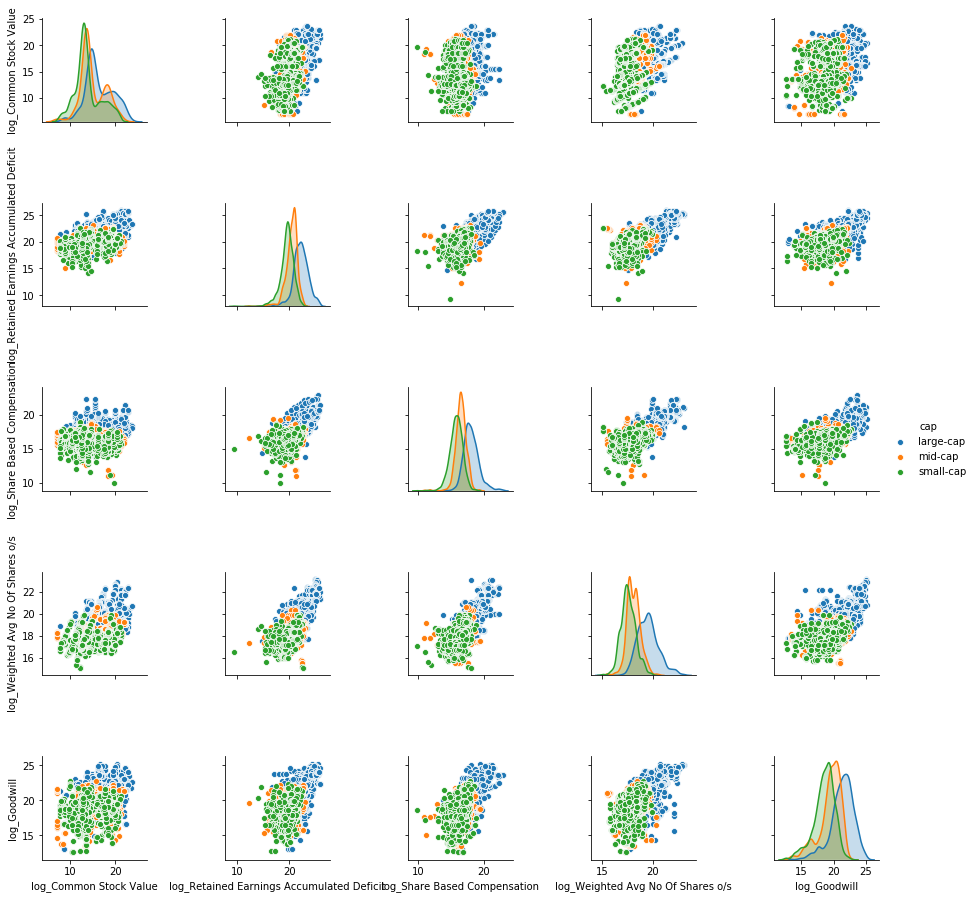

In [7]:
ax = sns.pairplot(df, hue='cap', hue_order=['large-cap', 'mid-cap', 'small-cap'], vars=log_fs);

---

In [8]:
df['predict'] = predict.map({0: 'large-cap', 1: 'mid-cap', 2: 'small-cap'})
df.loc[df['cap'] != df['predict'], ['security', 'year', 'cap', 'predict']]

,security,year,cap,predict
1991,Aaron's Inc.,2014.0,mid-cap,small-cap
2078,Amedisys Inc,2017.0,mid-cap,small-cap
2131,Amn Healthcare Services Inc,2017.0,small-cap,mid-cap
2144,Anixter International Inc.,2013.0,small-cap,mid-cap
2162,Applied Industrial Technologies,2015.0,small-cap,mid-cap
2190,Ascena Retail Grp,2014.0,small-cap,mid-cap
2226,Avanos Medical Inc,2018.0,mid-cap,small-cap
2283,Barnes Group Inc.,2017.0,small-cap,mid-cap
2412,CNO Financial Group,2018.0,mid-cap,small-cap
2529,Chemours,2015.0,mid-cap,small-cap


---

## Improvement To Model

- We could use more years of data (i.e. before 2009 and after 2019)